In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1234)

data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


Exploratory Data Analysis and Data Visualization

In [ ]:
data.shape

In [ ]:
#exploratory Data Analysis
data.head()
print(data.shape)


In [ ]:
data.describe()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   int64 
 14  JobSatisfaction         

In [ ]:
data.isna().sum()

In [ ]:
data["Attrition"].value_counts()

In [62]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Data Visualization

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x="Age", hue="Attrition", data=data, palette="colorblind")

In [ ]:
data["Age"].plot()

In [ ]:
data["DistanceFromHome"].plot()

In [ ]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data , x= 'Age',y = column,hue='Attrition')
    plt.show()

Data converting to numeric (data preprocessing step)

In [3]:
data['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
data['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
data['BusinessTravel'].replace('Non-Travel',3, inplace=True)
data['Gender'].replace('Male',1, inplace=True)
data['Gender'].replace('Female',0, inplace=True)
data['Department'].replace('Sales',1, inplace=True)
data['Department'].replace('Research & Development',2, inplace=True)
data['Department'].replace('Human Resources',3, inplace=True)
data['EducationField'].replace('Life Sciences',1, inplace=True)
data['EducationField'].replace('Other',2, inplace=True)
data['EducationField'].replace('Medical',3, inplace=True)
data['EducationField'].replace('Marketing',4, inplace=True)
data['EducationField'].replace('Technical Degree',5, inplace=True)
data['EducationField'].replace('Human Resources',6, inplace=True)
data['JobRole'].replace('Sales Executive',1, inplace=True)
data['JobRole'].replace('Research Scientist',2, inplace=True)
data['JobRole'].replace('Laboratory Technician',3, inplace=True)
data['JobRole'].replace('Manufacturing Director',4, inplace=True)
data['JobRole'].replace('Healthcare Representative',5, inplace=True)
data['JobRole'].replace('Manager',6, inplace=True)
data['JobRole'].replace('Research Director',7, inplace=True)
data['JobRole'].replace('Sales Representative',8, inplace=True)
data['JobRole'].replace('Human Resources',9, inplace=True)
data['MaritalStatus'].replace('Single',1, inplace=True)
data['MaritalStatus'].replace('Married',2, inplace=True)
data['MaritalStatus'].replace('Divorced',3, inplace=True)
data['OverTime'].replace('Yes',1, inplace=True)
data['OverTime'].replace('No',0, inplace=True)



In [ ]:
data.info()

In [ ]:
data.columns

Data preprocessing normalization and feature selection

In [4]:
from sklearn import preprocessing
#'EmployeeCount', 'Over18' and 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values.
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
data.info()

In [ ]:
X=data.select_dtypes(include=['int64'])
print(X.shape)
print(X)

In [5]:
y=data['Attrition']

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
import time

In [7]:
import pickle
with open('preprocessing.pkl','wb') as f:
    pickle.dump(data,f)

Training a Model

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

Logistic Regression

In [11]:
start = time.process_time()
logisticRegressionModel=LogisticRegression(max_iter=10000)
logisticRegressionModel.fit(X_train, y_train)
scores = cross_val_score(logisticRegressionModel, X=X_train, y=y_train, n_jobs=1)
print('time' ,(time.process_time() - start))
print(scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

time 11.921875
[0.86407767 0.8592233  0.83495146 0.86407767 0.83414634]
Cross Validation accuracy: 0.851 +/- 0.014


SVM 

In [12]:
from sklearn import svm
start = time.process_time()
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
scores = cross_val_score(svm_classifier, X=X_train, y=y_train, n_jobs=1)
print('time' ,(time.process_time() - start))
print(scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

time 1197.09375
[0.85436893 0.84466019 0.83980583 0.86407767 0.8195122 ]
Cross Validation accuracy: 0.844 +/- 0.015


Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
start = time.process_time()
randomForestClassifier=RandomForestClassifier(n_estimators=100)
randomForestClassifier.fit(X_train,y_train)
scores = cross_val_score(randomForestClassifier, X=X_train, y=y_train, n_jobs=1)
print('time' ,(time.process_time() - start))
print(scores)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


time 1.375
[0.8592233  0.86893204 0.84466019 0.8592233  0.85365854]
Cross Validation accuracy: 0.857 +/- 0.008


Testing

In [35]:
start = time.process_time()
predictedLog= logisticRegressionModel.predict(X_test)
print('time' ,(time.process_time() - start))
print(predictedLog)
print(f"Accuracy Score: {metrics.accuracy_score(y_test, predictedLog)}")
#print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,predictedLog)}")
#print(f"Balanced accuracy score: {metrics.balanced_accuracy_score(y_test,predictedLog)}")
#print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,predictedLog)}")


time 0.0
['No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' '

In [38]:
start = time.process_time()
predictedSVM= svm_classifier.predict(X_test)
print('time' ,(time.process_time() - start))
print(predictedSVM)
print(f"Accuracy Score: {metrics.accuracy_score(y_test, predictedSVM)}")
#print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,predictedLog)}")
#print(f"Balanced accuracy score: {metrics.balanced_accuracy_score(y_test,predictedLog)}")
#print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,predictedLog)}")

time 0.0
['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No

In [39]:
start = time.process_time()
predictedRF= randomForestClassifier.predict(X_test)
print('time' ,(time.process_time() - start))
print(predictedRF)
print(f"Accuracy Score: {metrics.accuracy_score(y_test, predictedRF)}")
#print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,predictedLog)}")
#print(f"Balanced accuracy score: {metrics.balanced_accuracy_score(y_test,predictedLog)}")
#print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,predictedLog)}")

time 0.046875
['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No

Saving the best model

In [40]:
with open('model.pkl','wb') as f:
    pickle.dump(logisticRegressionModel,f)

Finding the best 5 features         

<AxesSubplot: >

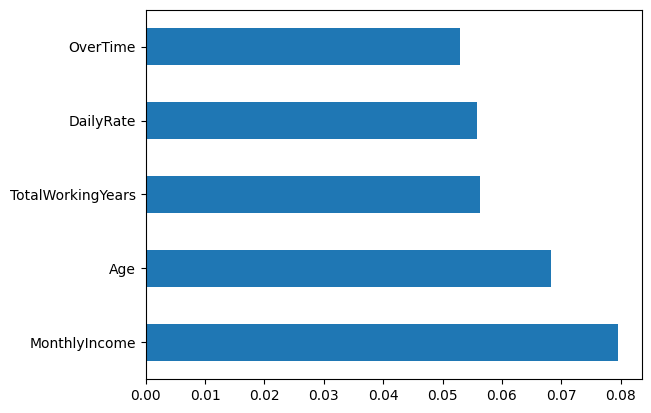

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X_encoded = pd.get_dummies(X, prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.30, random_state=101)
model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index= X_encoded.columns)
feature_imp.nlargest(5).plot(kind='barh')

Retraining and testing logistic regression with these 5 features

In [54]:
data2 = data
X1=data2[['MonthlyIncome','Age','DailyRate','TotalWorkingYears','OverTime']]
Y1 = data2['Attrition']


,MonthlyIncome,Age,DailyRate,TotalWorkingYears,OverTime
0,5993,41,1102,8,1
1,5130,49,279,10,0
2,2090,37,1373,7,1
3,2909,33,1392,8,1
4,3468,27,591,6,0
...,...,...,...,...,...
1465,2571,36,884,17,0
1466,9991,39,613,9,0
1467,6142,27,155,6,1
1468,5390,49,1023,17,0


In [56]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y1, test_size=0.3, random_state=0)

In [58]:
logisticRegressionModel1=LogisticRegression(max_iter=10000)
logisticRegressionModel1.fit(X1_train, y1_train)
scores1 = cross_val_score(logisticRegressionModel1, X=X1_train, y=y1_train, n_jobs=1)
print('time' ,(time.process_time() - start))
print(scores1)
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores1),np.std(scores1)))

time 4.75
[0.86407767 0.84951456 0.83495146 0.83980583 0.83414634]
Cross Validation accuracy: 0.844 +/- 0.011


In [59]:
start = time.process_time()
predictedLog1= logisticRegressionModel1.predict(X1_test)
print('time' ,(time.process_time() - start))
print(predictedLog1)
print(f"Accuracy Score: {metrics.accuracy_score(y1_test, predictedLog1)}")
#print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,predictedLog)}")
#print(f"Balanced accuracy score: {metrics.balanced_accuracy_score(y_test,predictedLog)}")
#print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,predictedLog)}")

time 0.0
['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No